In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

### Ambica Govind,EP21BTECH11007

### Problem 1

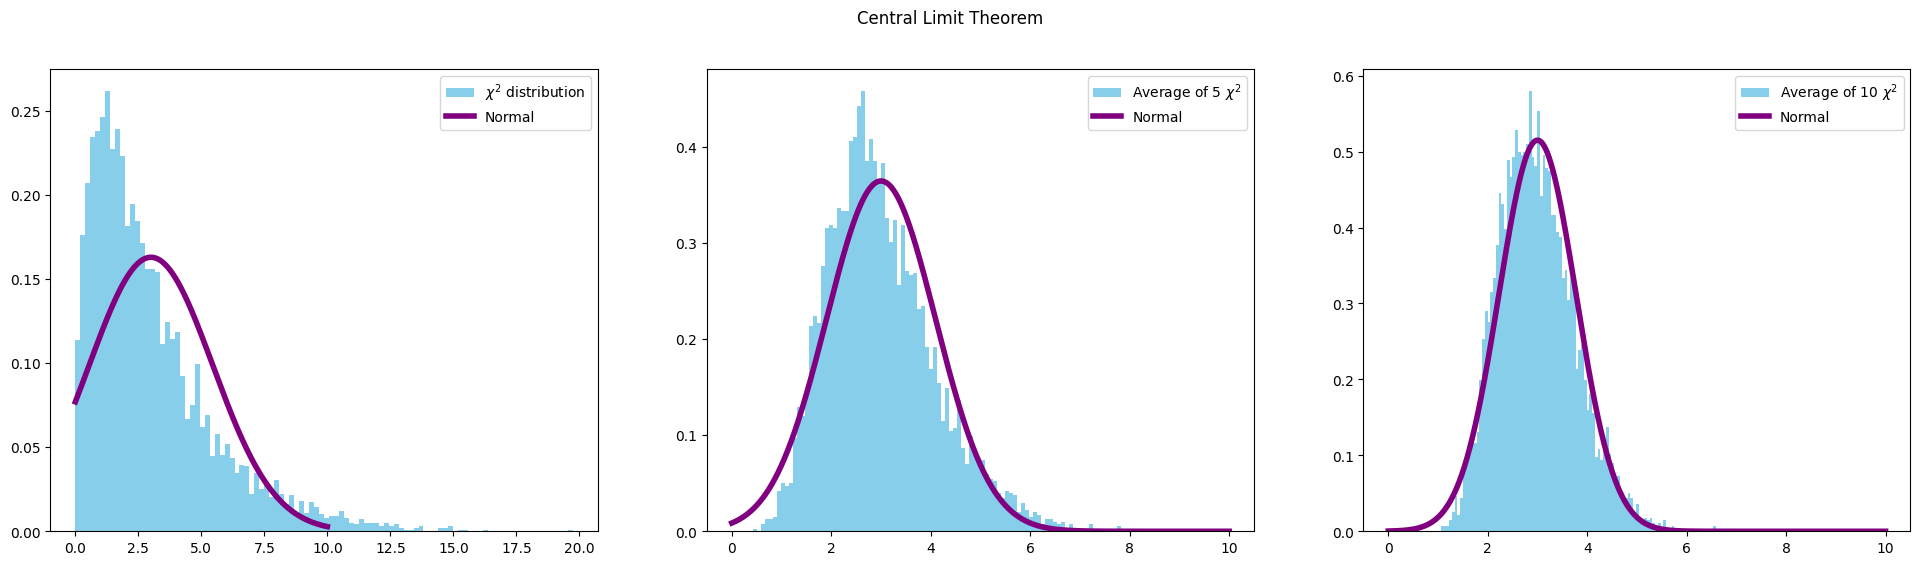

In [2]:
a=np.random.chisquare(3,(1,5000))
b=np.random.chisquare(3,(5,5000))
c=np.random.chisquare(3,(10,5000))
meanb=np.mean(b,axis=0)
meanc=np.mean(c,axis=0)

fig, ax = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(24)
fig.suptitle('Central Limit Theorem')

x = np.linspace(0, 10, 1000)

# A chisq dist with k dof has mean k and stdev sqrt 2k

mu=3
sigma=np.sqrt(6)
sigma5=np.sqrt(6/5)
sigma10=np.sqrt(6/10)

ax[0].hist(a[0],bins=100,color='skyblue',label='$\chi^2$ distribution')
ax[1].hist(meanb,bins=100,color='skyblue',label='Average of 5 $\chi^2$')
ax[2].hist(meanc,bins=100,color='skyblue',label='Average of 10 $\chi^2$')

ax[0].plot(x, stats.norm.pdf(x,mu,sigma), color='purple', linewidth=4, label='Normal')
ax[1].plot(x, stats.norm.pdf(x,mu,sigma5), color='purple',linewidth=4, label='Normal')
ax[2].plot(x, stats.norm.pdf(x,mu,sigma10), color='purple', linewidth=4,label='Normal')

ax[0].legend()
ax[1].legend()
ax[2].legend()

### Problem 2

In [3]:
data=np.genfromtxt('test.dat')
data[0:5]

array([[3.452e+02, 1.000e-01],
       [6.630e+01, 4.000e-02],
       [6.840e+02, 7.000e-02],
       [2.090e+02, 5.000e-02],
       [1.600e+01, 2.000e-02]])

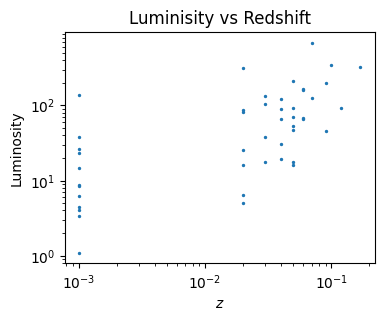

In [4]:
lx=[i[0] for i in data]
z=[i[1] for i in data]
fig,ax=plt.subplots(figsize=(4,3))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$z$')
ax.set_ylabel('Luminosity')
ax.set_title('Luminisity vs Redshift')
plt.scatter(z,lx,s=2)

By eye they appear uncorrelated at lower redshift whereas slightly positively correlated at higher redshifts

In [5]:
cc_p,p_p = stats.pearsonr(lx,z)
cc_s,p_s = stats.spearmanr(lx,z)
cc_k,p_k = stats.kendalltau(lx,z)
df=pd.DataFrame({'Name':['Pearson','Spearman','Kendall-Tau'],'Correlation Coefficient':[cc_p,cc_s,cc_k], 'p-value':[p_p,p_s,p_k]})
df

,Name,Correlation Coefficient,p-value
0,Pearson,0.514450,2.546472e-04
1,Spearman,0.659633,6.166490e-07
2,Kendall-Tau,0.502958,2.969686e-06


Since $p \lt \lt 1$ for a moderate correlation coefficient, they seem to be 
uncorrelated.

### Problem 3

In [6]:
data=np.loadtxt('prob3.txt')
data

array([2.750e+00, 7.800e+00, 1.164e+01, 1.379e+01, 1.420e+01, 1.315e+01,
       1.114e+01, 8.720e+00, 6.340e+00, 4.300e+00, 2.730e+00, 1.620e+00,
       9.100e-01, 4.800e-01, 2.400e-01, 1.100e-01, 5.000e-02, 2.000e-02,
       1.000e-02, 0.000e+00])

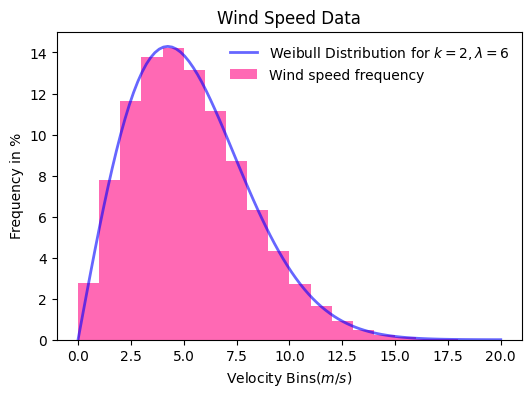

In [7]:
intervals=np.arange(0.5,20.5,1)

fig,ax=plt.subplots(figsize=(6,4))
ax.set_xlabel('Velocity Bins$(m/s)$')
ax.set_ylabel('Frequency in %')
ax.set_title('Wind Speed Data')
ax.bar(intervals,data,width=1,color='hotpink',label='Wind speed frequency')

dist=stats.dweibull(2,0,6)
x = np.linspace(0,20, 100)

ax.plot(x, 2*100*dist.pdf(x),'b-', lw=2, alpha=0.6,label='Weibull Distribution for $k=2, \lambda=6$')
ax.legend(frameon=False,bbox_to_anchor=(1,1))

### Problem 4

In [8]:
dist=stats.norm(0,1)
a1=dist.rvs(1000)
a2=dist.rvs(1000)
cc,p = stats.pearsonr(a1,a2)
print('Pearson Correlation Coefficient=',cc)
print('p-value=',p)

Pearson Correlation Coefficient= 0.004202860465305412
p-value= 0.8943986312349376


The samples are uncorrelated as suggested by the Correlation Coefficients(this is expected)

In [9]:
#dof=NO of samples-No of estimates(2, mean and std)
dof=len(a1)-2 
t=cc/np.sqrt((1-cc**2)/dof)
p=2*(1 - stats.t(dof).cdf(np.abs(t)))
p

0.8943986312349113

The p value of the t distribution is same as that calculated earlier.